# K-NEAREST NEIGHBOURS
Objective:

The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets

Dataset:

Need to Classify the animal type
Tasks:

1. Analyse the data using the visualizations

2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the dataset to analyze its contents
file_path = '/content/Zoo.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## visualize the distribution of various features and the relationship between the features and the target class.

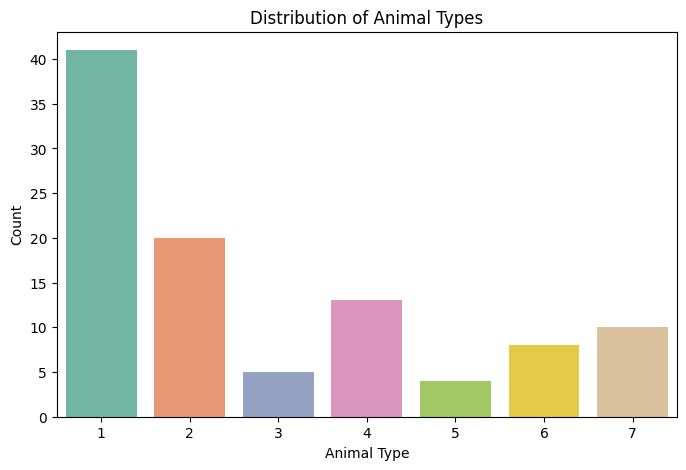

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [8]:

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Plot the distribution of the 'type' column to understand class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=data, palette='Set2')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

missing_values


## data preprocessing, including handling potential outliers and preparing the data for model training by splitting it into training and testing sets.

In [9]:
from sklearn.model_selection import train_test_split

# Dropping 'animal name' since it is not useful for classification
data_cleaned = data.drop(columns=['animal name'])

# Splitting the dataset into features (X) and target (y)
X = data_cleaned.drop(columns=['type'])
y = data_cleaned['type']

# Splitting the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting splits
(X_train.shape, X_test.shape)


((80, 16), (21, 16))

## implement the K-Nearest Neighbors (KNN) algorithm using scikit-learn and evaluate its performance using accuracy, precision, recall, and F1-score metrics.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the K-Nearest Neighbors classifier with k=5 and Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model on the training data
knn.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Classification Report:\n", classification_rep)



Accuracy:  0.9523809523809523
Precision:  0.9166666666666666
Recall:  0.9523809523809523
F1-score:  0.9319727891156462
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21



## Visualize the decision boundaries of the classifier.

Step 1: Perform PCA to reduce dimensionality

In [14]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca', X_train_pca.shape)
print('X_test_pca', X_test_pca.shape)

X_train_pca (80, 2)
X_test_pca (21, 2)


Step 2: Train the KNN classifier on the PCA-reduced dataset

In [16]:
# Initialize KNN with k=5 and train on the PCA-reduced training data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

# Predict on the PCA-reduced test set
y_pred_pca = knn_pca.predict(X_test_pca)

print('y_pred_pca', y_pred_pca.shape)

y_pred_pca (21,)


Step 3: Visualize the decision boundaries

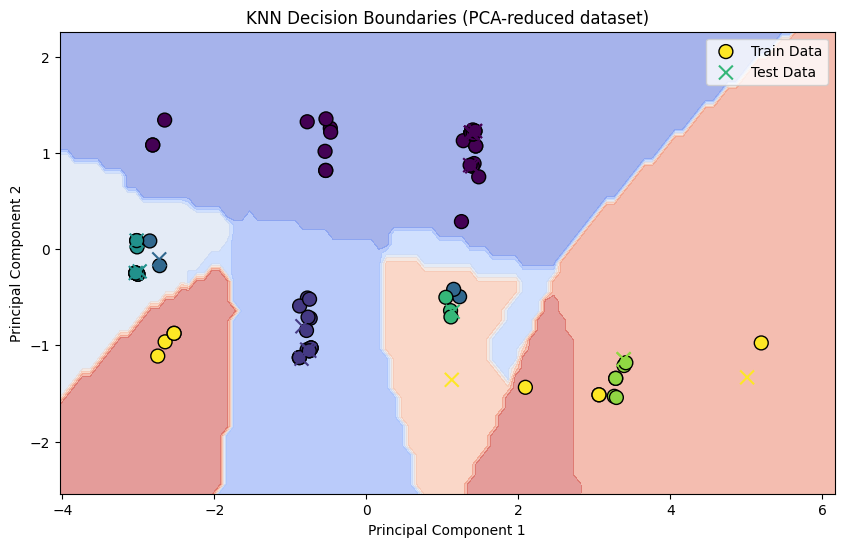

In [17]:
# Create a meshgrid to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict classes for each point in the meshgrid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

# Scatter plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', s=100, label='Train Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='x', s=100, label='Test Data')

plt.title("KNN Decision Boundaries (PCA-reduced dataset)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

## Interview Questions:

## Question 1: What are the key hyperparameters in KNN?

* **Number of neighbors (K)**: This is the most important hyperparameter. It determines how many neighbors vote to classify a new point. A small K can lead to overfitting, while a large K might smooth out decision boundaries too much.

* **Distance metric**: The metric used to calculate the distance between data points. Common options are Euclidean, Manhattan, or Minkowski distance.

* **Weights**: You can assign weights to neighbors, such as "uniform" (equal weight) or "distance" (closer neighbors have more influence).

## Question 2: What distance metrics can be used in KNN?

* **Euclidean distance**: The most common distance metric, representing the straight-line distance between two points in the feature space.

* **Manhattan distance**: The distance between two points measured along axes at right angles (useful in grid-like structures).

* **Minkowski distance**: A generalization of both Euclidean and Manhattan distances, with a parameter
p that allows you to adjust the metric.

* **Hamming distance**: Used for categorical or binary variables, representing the number of positions at which two strings differ.